# **Salary Prediction based on Country & Race**

The aim of this project to preddict the salary of individuals from varied contries and races based on their demographics such as **Occupation**, **Age**, **Gender**, **Experience**, **Education**, etc.The dataset is taken from Kaggle.The dataset has 32561 rows and 15 columns.The dataset has 8 independent variables and 1 target variablei.e **Salary**.

<h1><center><img src = "https://akm-img-a-in.tosshub.com/businesstoday/images/story/202302/salary_hike-sixteen_nine.png" style = 'width: 800px; height: 400px'</center><h1>

# **About the Dataset**

The datset consist of a comprehensive collection of salary and demographic information with additional details on years of experience.It offers a valuable resource for studying the relationship between income and various socio-demographic factors.The demographic attributes include **Age**, **Gender**, **Education**, **Country** and **Race** providing a diverese range of variables for analysis.Researchers can explore patterns and trends in income distribution across different demographic categories,alllowing for insights into potenital disparities or variations in earning potential.The dataset incorporatesthe crucial dimensionof years of experience, enabling investigations inton the impact of professional tenure on salary levels.

# **Objectives.**
1. Importing The Libraries
2. Loading the Data
3. Data Preprocessing 1
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing 2
6. Conclusion

# 1. **Importing the Libraries.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. **Loading the Data**

In [2]:
df = pd.read_csv('D:\\Data Analysis\\Data-Science-Projects-main\\Salary Prediction\\Salary Data.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [3]:
df.tail()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean
6703,6703,26.0,Female,High School,Sales Executive,1.0,35000.0,Canada,Black


# 3. **Data Preprocessing 1**

In [4]:
# Checkig the shape of the data 
df.shape

(6704, 9)

In [5]:
# Checking the null/missing values
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

### Since the number of rows with null/missing values is very less as compared to the total numbers of row, I will be dropping these rows.

In [6]:
df.dropna(axis =0, inplace = True)

In [7]:
# Checking for null values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

### Droping Un-named Columns because it is just an index columns

In [8]:
# Dropping columns
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

### Checking the data types of each columns

In [9]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

### Checking the Unique values in each columns

In [10]:
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

### The job title columns has 191 different  values. It will be very difficult to analyze so many job titles. So i will groip the job titles under similar job domains.

### Grouping Job Titles

In [11]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [12]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower()
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social meadia' in job_title:
        return 'Marketing/Social Meadia'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Finacial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'
df['Job Title'] = df['Job Title'].apply(categorize_job_title)

###  **Grouping Education Level**

In [13]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

### In the dataset the educatiion level represented in two different ways: **Bachelor** and **Bachelor Degree** which means same. So i will be grouping it with **Bachelor**.

In [14]:
def group_education(Education):
    
    Education = str(Education).lower()
    if 'high school' in Education:
        return 'High School'
    elif 'bachelor\'s' in Education:
        return 'Bachelors'
    elif 'master\'s' in Education:
        return 'Masters'
    elif 'phd' in Education:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)

### **Descriptive Statistics**

In [15]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [16]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


# 4. **Exploratory Data Analysis (EDA)**

In the exploratoey data analysis i will be looking at the data and try to understand the data. I will by looking at the distribution of data across the dataset followed by visualizing the data to understand the relationship between the features and the target variables.

## 4.1 **Pie Chart for Gender**

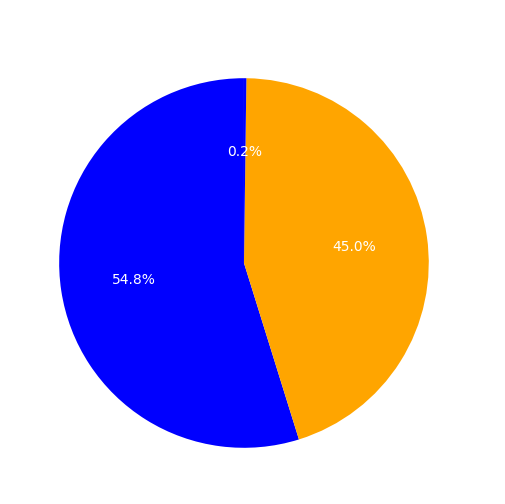

In [17]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']
plt.style.use('dark_background')
plt.pie(df['Gender'].value_counts(), labels = ['Male', 'Female', 'Other'], colors = colors, autopct = '%1.1f%%', startangle = 90)
plt.title('Gender Distribution')
plt.show()

 The pie chart shows that majority of the employees are male with **5.8%** on the dataset, followed by females with **45%** and **0.2%** employees belong to other gender.

# 4.2  **Age Distribution**

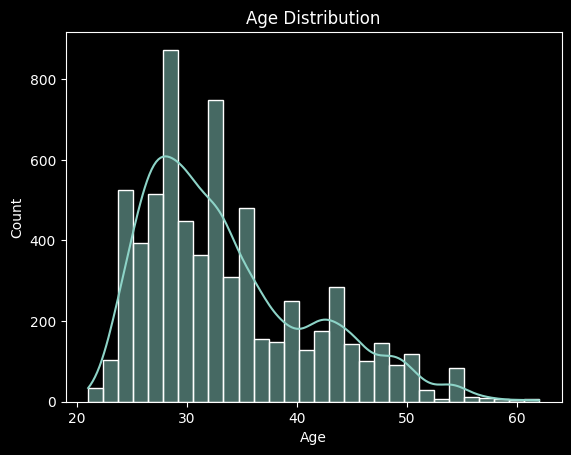

In [18]:
sns.histplot(data = df, x = 'Age', bins = 30, kde = True)
plt.title('Age Distribution')
plt.show()

 Majority of the employee are in the range of **25-35 years** of the age which means of the employees are young and energetic. There is only minimal number of old employees in the dataset having age more than **55 years**.

# 4.3 **Education Level**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

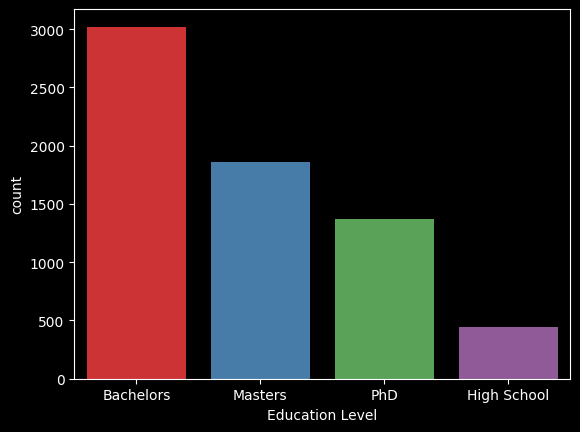

In [19]:
sns.countplot(x = 'Education Level', data = df, palette='Set1')
plt.xticks(rotation=360)

 Most of the employees have a **Bachelor's degree** followed by **Master degree** and **PhD degree**. The last number of employees have a **High School  Education**. From the graph it is clear that most of the employees started working after graduationn few of them started woking after post graduation and very have gone for doctorate. The least number of employees have working after high school education.

# 4.4 **Job Title**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Meadia'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Finacial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

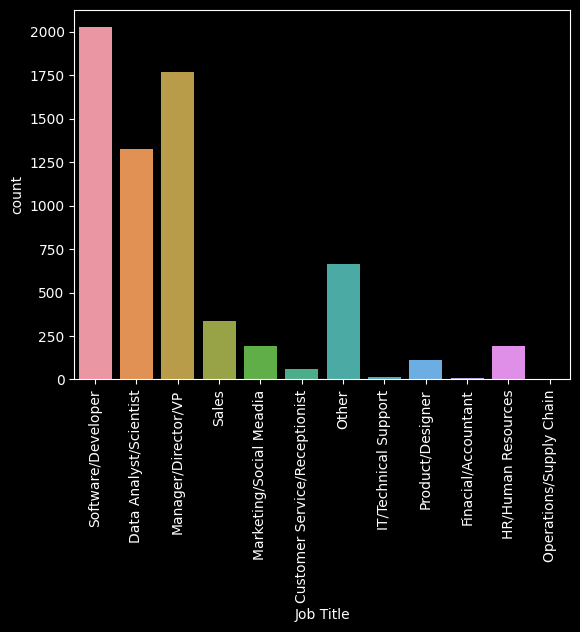

In [20]:
sns.countplot(x = 'Job Title', data = df)
plt.xticks(rotation = 90)

 This graph helps us to breakdown the data of job title in a simpler from. From the graph it is clear that majority of the employees have job title -**Software Developer**, **Data Analyst/Scientist**, or **Manager/Director/VP**. Few amount of employees have job title such as **Sales**, **MArketing/Social MEadia**, **HR**, **Product Designer** and **Customer Service**. Very few of the employees work as a **Financial/Accountant**, and **Operation Mamagement**.
 
 From this I build a hypothesis that the job title such as **SOftware Develloper**, **Data Analyst/Scientist** and **Manager/Director** are in more demand as compared to other job titles.It also means that job titles like **Financial/Accountant** or **Operation/Supply Management*** and **Customer Service** are in less demand and paid comparatively less.

# 4.5 **Years OF Experience**

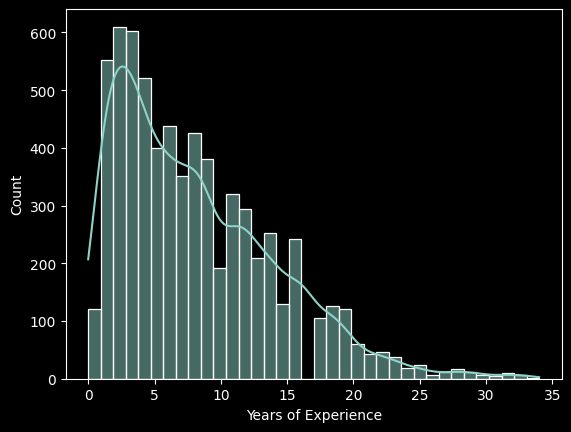

In [21]:
sns.histplot(data = df, x = 'Years of Experience', kde = True)
plt.show()

 Most of the employees in the dataset have experience of **0-7 Years** in the respective domains in which particularly majority oh them have experience between less than **5 Years***. Moreover the number of employees i the dataset decreases with increasing number of years of experience.

# 4.6 **Country**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

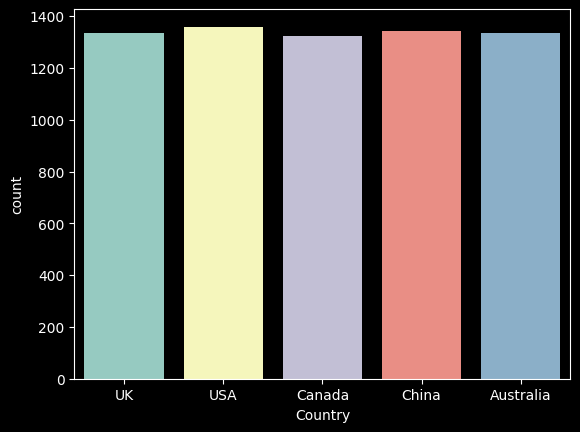

In [22]:
sns.countplot(data = df, x = 'Country')
plt.xticks(rotation = 360)

 The number of employees from the above 5 coubtries is nearly same, with a little more in **USA**.

# 4.7 **Racial Distribution**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

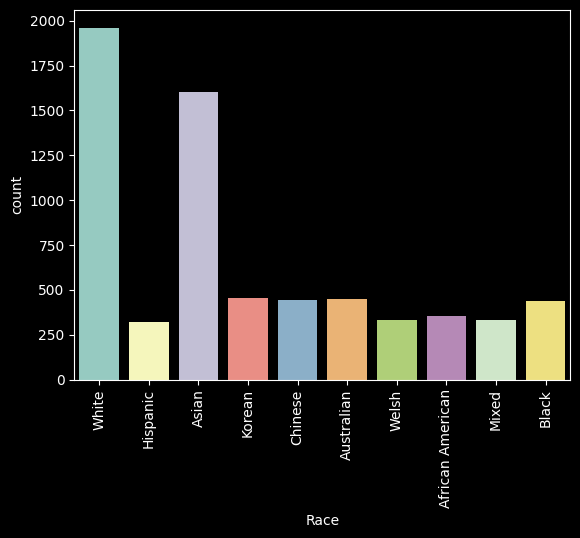

In [23]:
sns.countplot(data = df, x = 'Race')
plt.xticks(rotation = 90)

This graph helps us to know about the racial distribution in the dataet. From the graph it is clear that most of the employees are either **White**, or **Asian** followed by **Korean**, **Chinese**, **Australian** and **Black**. Number of employees from **Welsh**, **African American**, **Mixed** and **Hispanic** race are less as compared to other groups.

From all the above plots and graphs we can a understanding aboyt the data we are dealing with its distribution and quantity as well. Now i am gonna explore the relation of these independent variables with the target variables i.e. Salary.

# 4.8 **Age and Salary**

Text(0.5, 1.0, 'Age vs Salary')

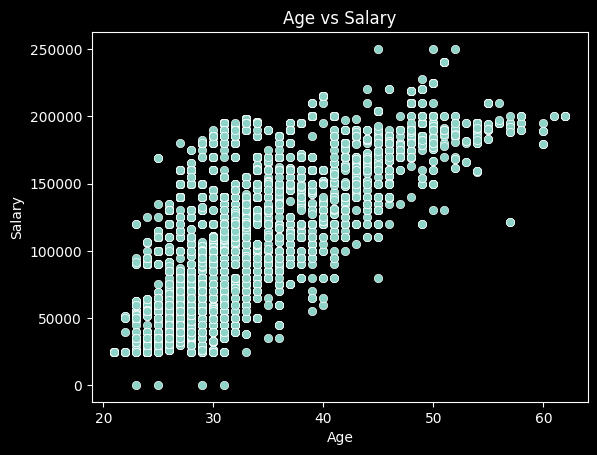

In [24]:
sns.scatterplot(data = df, x = 'Age', y = 'Salary')
plt.title('Age vs Salary')

In this scatter plot we see a trend that the salary of the person increases with incerese in the age which is obvious because of promotion and apprisals. However upon closer observaton we can find that similar age have multiple salaries which means there are other factors which decides the salary.

# 4.9 **Gender and Salary**

Text(0.5, 1.0, 'Gender vs Salary')

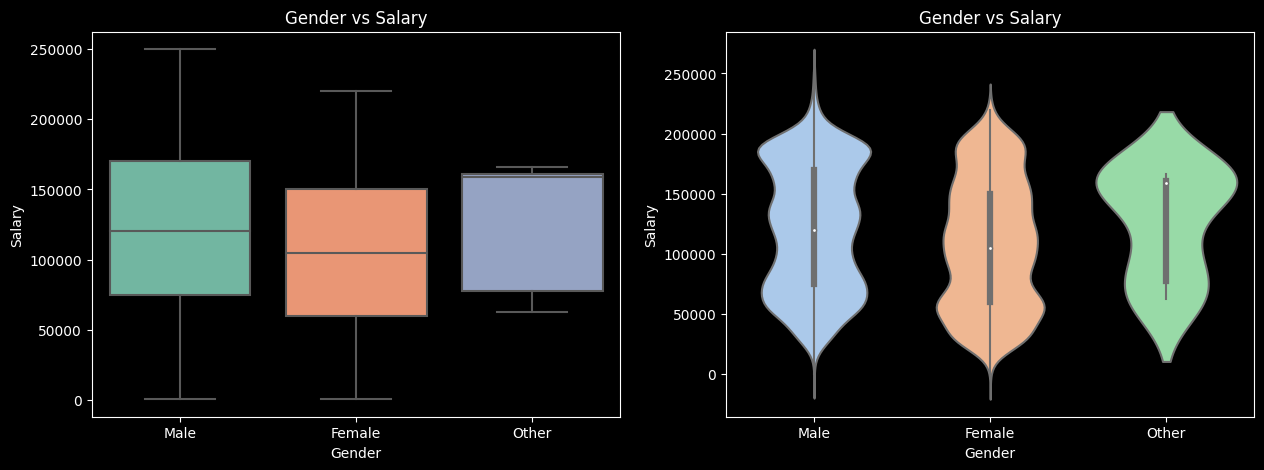

In [25]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, palette = 'Set2', ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, palette = "pastel", ax = ax[1]).set_title('Gender vs Salary')

THe boxplot and violinplot describes the salary distribution among the three genders. In the boxplot the employees from **Other Gender** has quite as compared to **Males** and **Females**. The other gender employees  havve a median salary above **150000** followed by males with median salarry near **107500** and females with meadian salary near **100000**. The violin plot visualize the distribution of salary with respect to the gender where most of the **Other Gender** employees have salary above **150000**. In makes this distribution is concentrated between **50000** and **10000** as well as near **200000**. In case of females there salary distribution is quite as compared to other genders with most near **50000**.

# 4.10 **Education Level and Salary**

Text(0.5, 1.0, 'Education Level vs Slary')

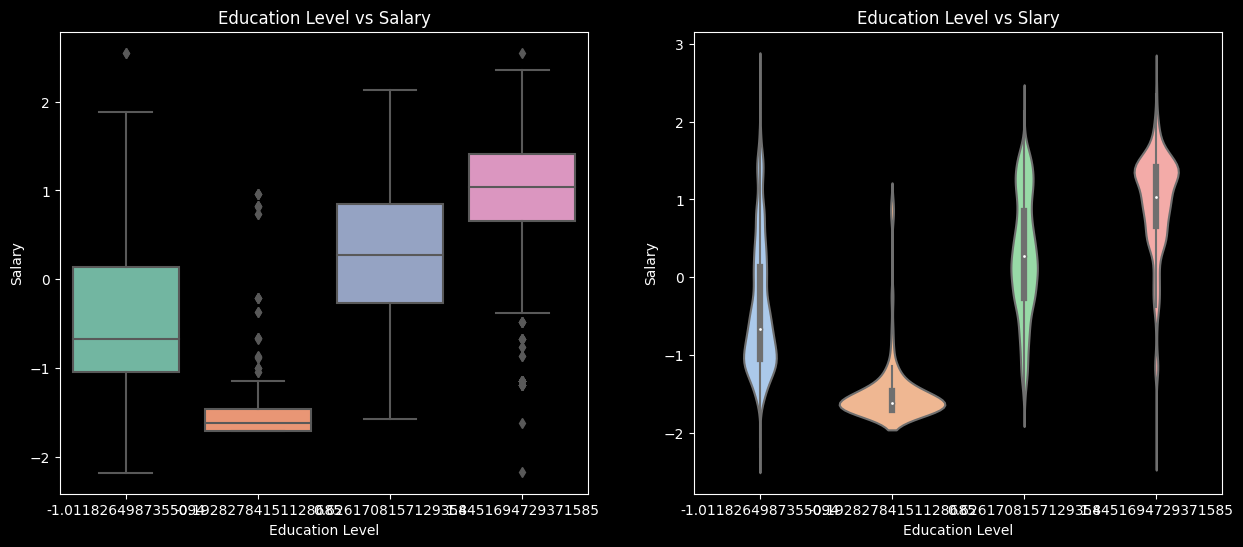

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, palette = 'Set2', ax = ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = df, palette = 'pastel', ax =ax[1]).set_title('Education Level vs Slary')

The boxplot and violinplot shows the distribution of salary based on the employees educationn level. The median salary for the **PhD** holders is highest follwed by **Master** and **Bachelors Degree** holders with employees with no degree having the lowest median salary. In the  violinplot the PhD Scholars have distribution near **200000** hwereas degree holdes have a very sleak distribution where the salary distribution is spread from **100k** to **150k**. The Bachelors degree holders have a salary distribution near **50000** whereas the employees with no degree have a salary distribution near **40k-45k**.

# 4.11 **Job Title and Salary**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Meadia'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Finacial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

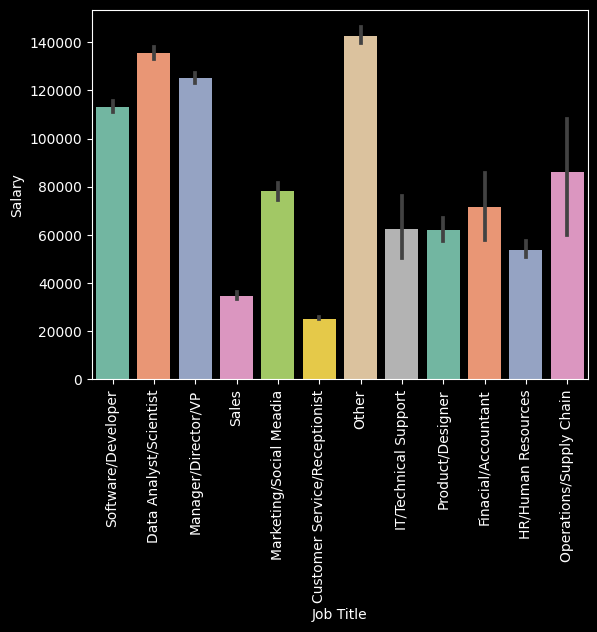

In [27]:
sns.barplot(data = df, x = 'Job Title', y = 'Salary', palette = 'Set2')
plt.xticks(rotation = 90)

The graph falsifies my previous hypothesis regarding the demand and paywith  respect to job title. In this graph **Other** category job title have higher salary than those title which assumed to be in high demand and pay. In contrast to previous job title graaph this  graph shows that there is no relation between the job title distribution and salary. The job title which gave high salary are found to be less in number.

However the hypothe sis is true about the Job Title such **Software Developer**, **Data Analyst/Scientist** and **Manager/Director/VP**.These job titles are found to be inhigh demand aand pay. But in contrast to that the titles such as **Operation/Supply Chain**, **HR**, **Financial/Accountant** and **Marketing/Social Media** are found have much more salry as assumed.

# 4.12 **Experience and Salary**

Text(0.5, 1.0, 'Years of Experience vs Salary')

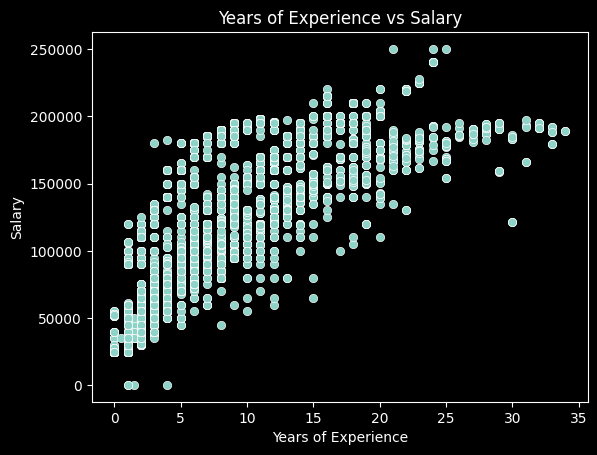

In [28]:
sns.scatterplot(data = df, x = 'Years of Experience', y = 'Salary').set_title('Years of Experience vs Salary')

From this scatterplot it is clear that  on the whole the salary of the employees is increasing with the years of experience. However on closer look we can see that similar experience have different salaries. This is because the salary is also dependent on other factors like **Job Title**, **Age**, **Gender**, **Education Level** as discussed earlier.

# 4.13 **Country and Salary**

<Axes: xlabel='Country', ylabel='Salary'>

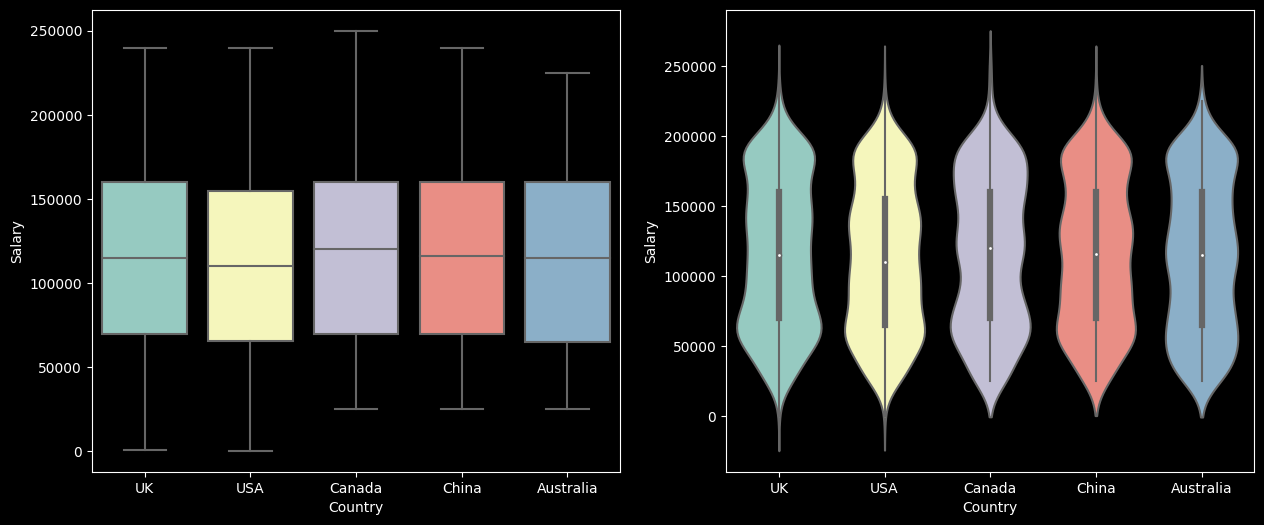

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax = ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, ax = ax[1])

Both the boxplot and violinplot shows very similar insight about the salary across all the countiries even in the violinplot distribution. However there is very small variation in median salary in **USA** which is slighly less as compared to other coutries.

Since the we cannot get much information abiut the salary with respect to the countries.Sp i will plot the job title vs salary graph for each country so that we can get a overview of **Job Title** vs **Salary** for each country.

In [32]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


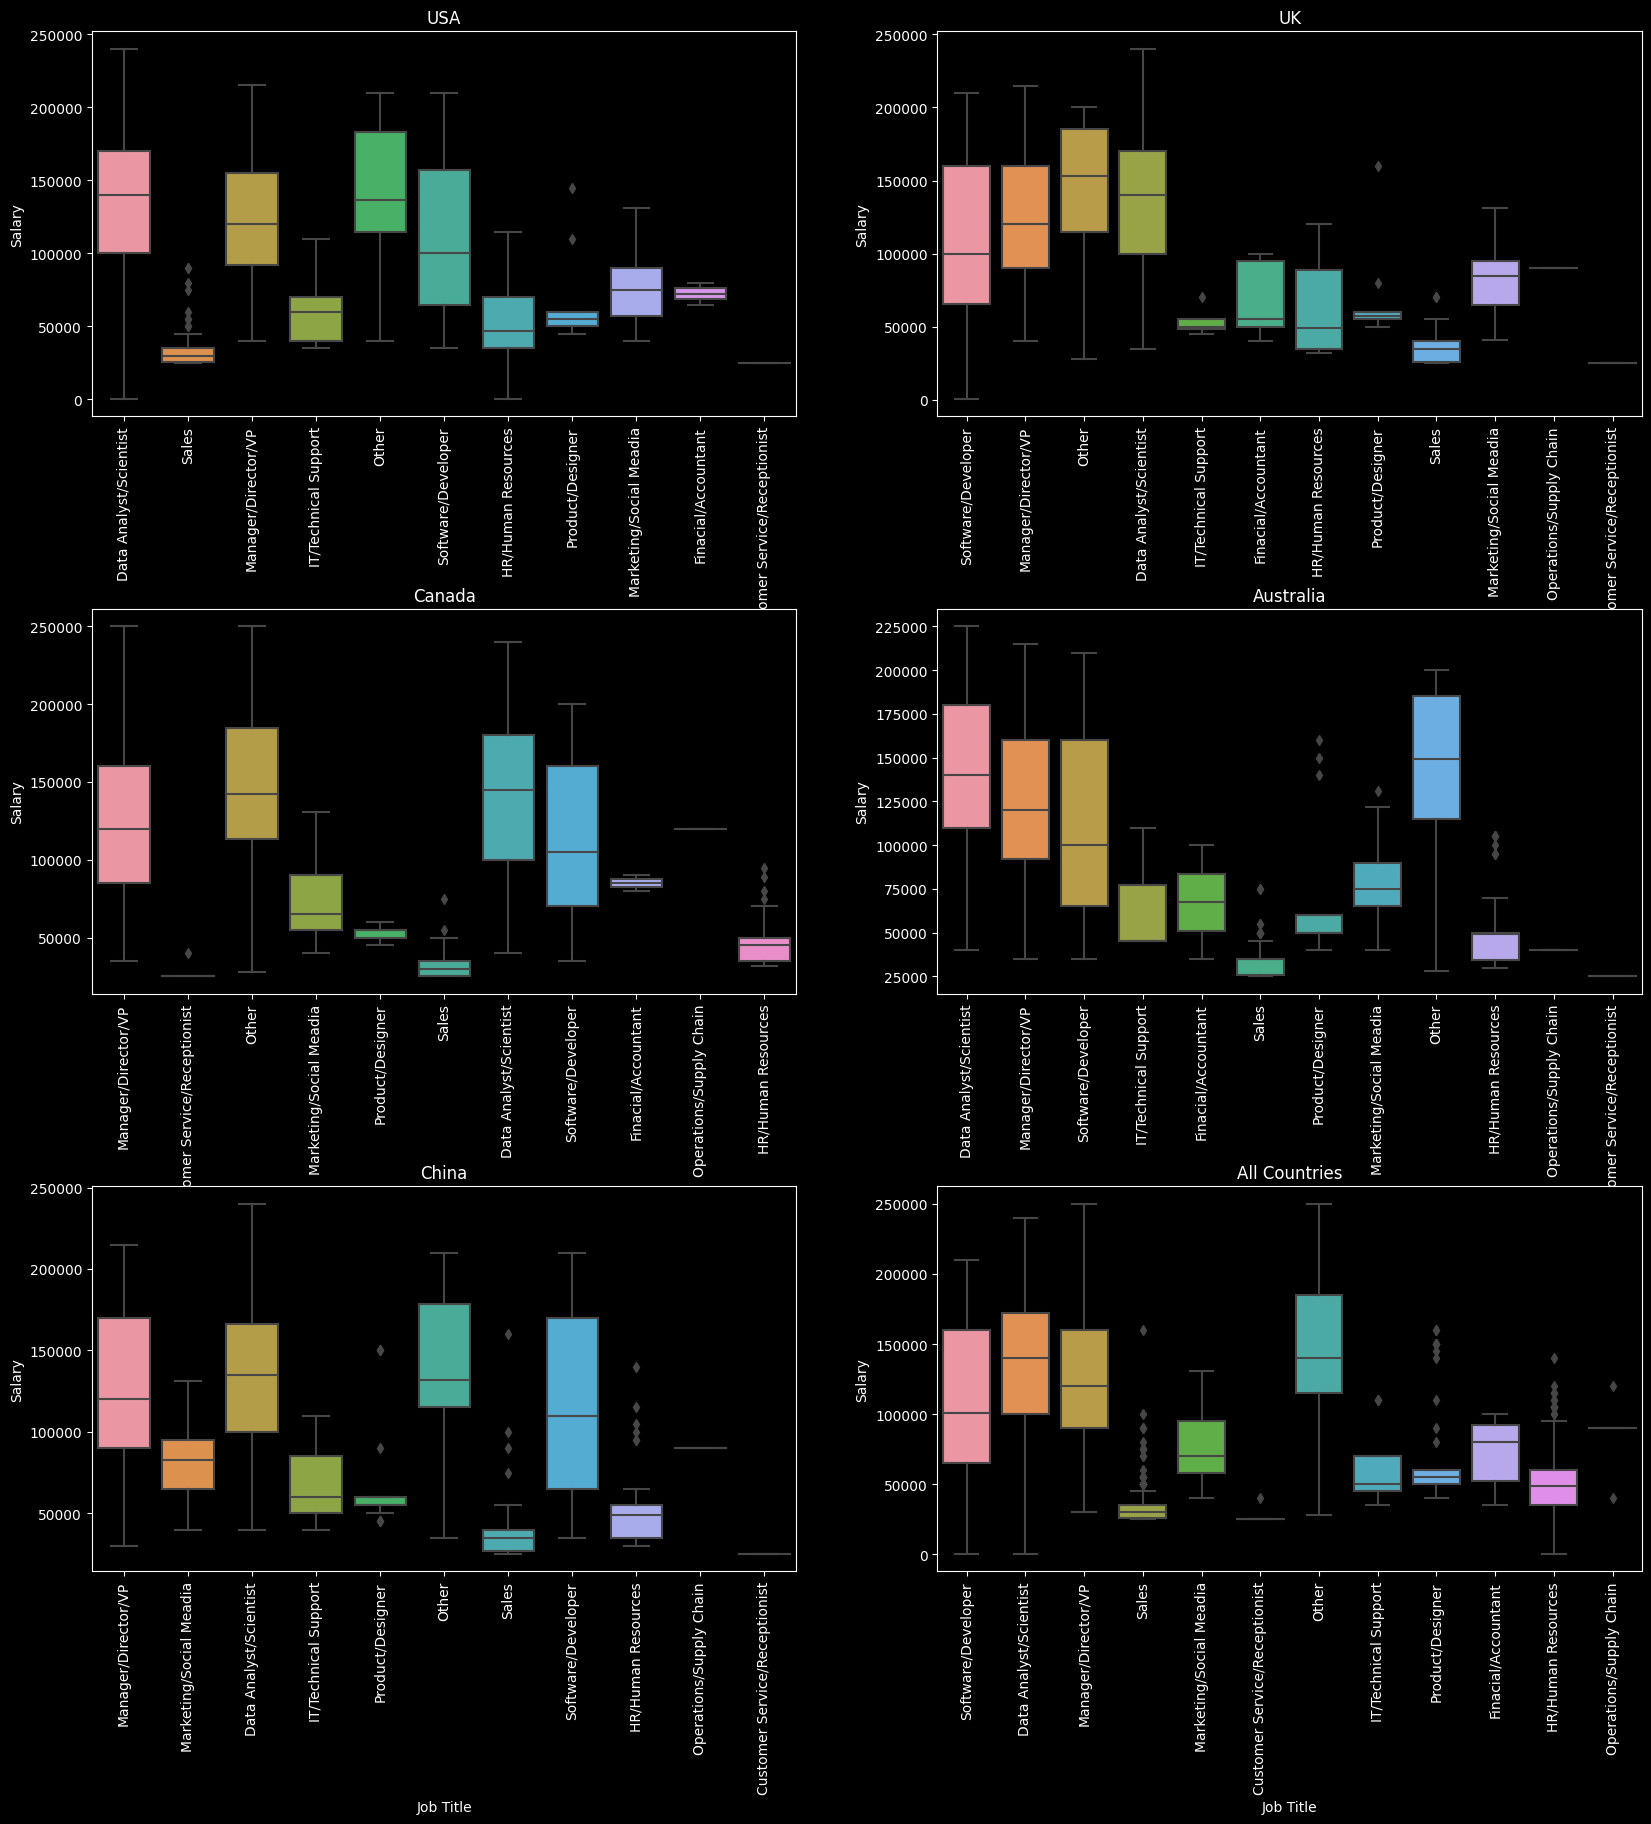

In [37]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

After observing all these plots, I conclude that the **Job Title** as **Software Developer**, **Mamager/Director/VP** and **Data Analyst/Scientist** hare in high demand as well as receive much higher salary than other jobs titles, excluding the jobb titles taht come under **Other Category**. The job titles such as **Operationn/Supply Chain**, **Customer Service/Receptionist**, **Product  Designer** and **Sales** are in low demand and have low salary.

# 4.13 **Race and Salary**

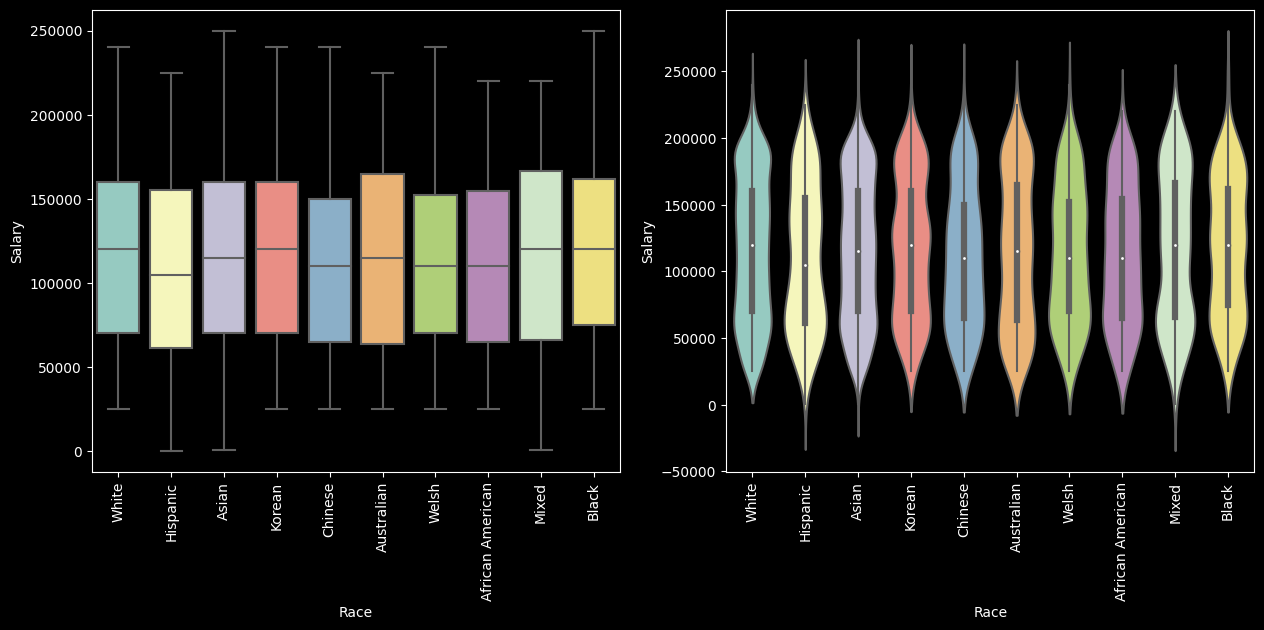

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.boxplot(data = df, x = 'Race', y = 'Salary', ax = ax[0])
ax[0].tick_params(axis = 'x', rotation = 90)

sns.violinplot(data = df, x = 'Race', y = 'Salary', ax = ax[1])
ax[1].tick_params(axis = 'x', rotation = 90)

THe employees from the races **Australian**, **Mixed**, **Black** and **White**  have the highest medain salary followed by **Asian**, **Korean**, and **Chinese** with lowerst salary in emplloyees from hispanic race. Looking at the violin plot the salary distribution is more concevtrated  after **150k** in **White**, **Australian**, **Mixed**, and **Black** race. Whereas the hispanic has more concentration near **75k**.

# 5. **Data Preprocessing 2**

### **Label encoding to categorical features**

In [42]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender', 'Country', 'Education Level', 'Job Title', 'Race']
le =LabelEncoder()
for features in features:
    le.fit(df[features].unique())
    df[features] = le.transform(df[features])
    print(features, df[features].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


### **Normalization**

In [46]:
# Normalization the continuous variables.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [47]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


### **Co-relation Matrix Heatmap**

<Axes: >

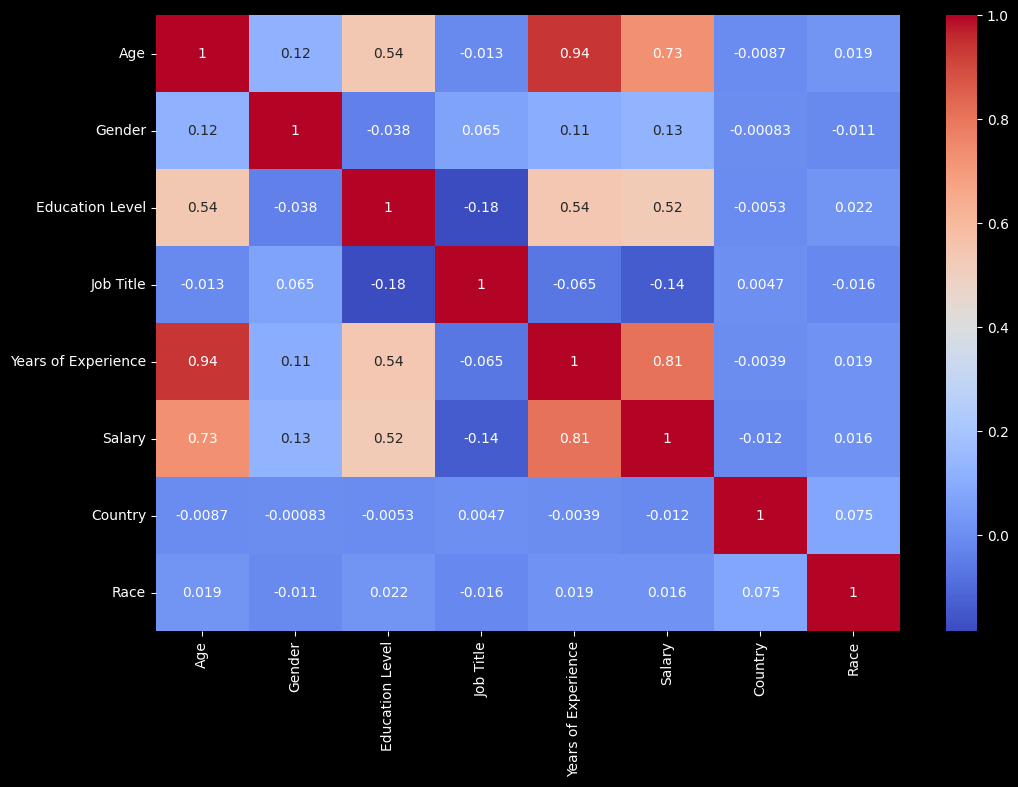

In [48]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

# **Conclusion**

In this Co-relation matrix there are three majot co-relation.
1. **Salary and Age**
2. **Salary and Years of Experience**
3. **Years of Experience and Age**

The co-relation salary with **age** and **years of experience** is already explored in the above plots. The co-relation between the **years of  experience** and **age** is obvious as the person ages the experience will be more.